<a href="https://colab.research.google.com/github/MaxSMCON/Group_2/blob/main/Group_2_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2 Project

## Global food in 

in this project we are going to investigate 

In [133]:
# https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing




In [134]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
%matplotlib inline
from IPython.display import display
import requests
import io
from io import StringIO
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn import metrics

# StatsModel
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
# 1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG
#https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing

# https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing

# Introduction

### Some functions

In [210]:
def description(df):
  print(df.shape)
  print('null values\n',df.isnull().sum())
  print(df.info())
  print(df.head())
  return


# Loading the Global Food dataset from google drive [Fact Table]


In [136]:
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id="1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY",
                                    dest_path="./global_food_prices.csv",
                                    unzip=False)
data = pd.read_csv("global_food_prices.csv")
df = data.copy()
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


Cover mp_price with UOM

## Working with GDP data from GitHub 

In [203]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/GDP.csv'
df_gdp = pd.read_csv(url, 
                    #  index_col=0, 
                     encoding= 'latin-1' )
df_gdp = pd.melt(df_gdp, id_vars=["Country",
                           "Subject Descriptor",
                            "Units","Scale",
                            "Country/Series-specific Notes"
                            ],
                   var_name ="Year",value_name="Value"
              )
# cleaning Value column
df_gdp['Value'] = df_gdp["Value"].str.replace(',','')
df_gdp['Value'] = df_gdp["Value"].str.replace('--','')

# converting Value column to numeric
df_gdp['Value'] = pd.to_numeric(df_gdp["Value"])
# Dropping attributes
df_gdp = df_gdp.drop(['Subject Descriptor',
                      'Country/Series-specific Notes' ,
                      'Scale',
                      
                      ], axis = 1)
# ///////////////////////////////////
# replacing null values with mean

# df_gdp = df_gdp['Value'].fillna(df_gdp.groupby([
#         'Country',
#         'Year'
# ])['Value'].transform('mean'), inplace = True)
# df_gdp = df_gdp[df_gdp['Value']!='NaN']

# removing zeroes

df_gdp.dropna(inplace= True)

df_gdp=df_gdp[df_gdp.Year != 'Estimates Start After']# Droping non year values from the file 

# print(df_gdp.shape)
# print('null values\n',df_gdp.isnull().sum())
# print(df_gdp.info())
# df_gdp.head()

In [204]:
print(df_gdp.shape)
print('null values\n',df_gdp.isnull().sum())
print(df_gdp.info())
print(df_gdp.nunique())
df_gdp.head()

(5811, 4)
null values
 Country    0
Units      0
Year       0
Value      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5811 entries, 1 to 6135
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  5811 non-null   object 
 1   Units    5811 non-null   object 
 2   Year     5811 non-null   object 
 3   Value    5811 non-null   float64
dtypes: float64(1), object(3)
memory usage: 227.0+ KB
None
Country     196
Units         1
Year         31
Value      5688
dtype: int64


,Country,Units,Year,Value
1,Albania,National currency,1991,252.921
2,Algeria,National currency,1991,3393.450
4,Angola,National currency,1991,283.298
5,Antigua and Barbuda,National currency,1991,1.708
6,Argentina,National currency,1991,350.738


## RAMILA CODE START - GDP PIVOT

In [205]:
## Ramila Code
# url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/GDP.csv'
# df_gdp = pd.read_csv(url, encoding= 'latin-1' )
# df_gdp = df_gdp.melt(id_vars=[ "Country","Subject Descriptor","Units","Scale","Country/Series-specific Notes"],var_name="Year",value_name="Value")
df_gdp.tail()



,Country,Units,Year,Value
6131,Vietnam,National currency,2021,5176083.150
6132,West Bank and Gaza,National currency,2021,56.894
6133,Yemen,National currency,2021,206.931
6134,Zambia,National currency,2021,138.803
6135,Zimbabwe,National currency,2021,19.040


In [206]:
df_gdp=df_gdp.dropna() # Droping all NAN values from the file 
df_gdp.head()



,Country,Units,Year,Value
1,Albania,National currency,1991,252.921
2,Algeria,National currency,1991,3393.450
4,Angola,National currency,1991,283.298
5,Antigua and Barbuda,National currency,1991,1.708
6,Argentina,National currency,1991,350.738


In [ ]:
# df_gdp=df_gdp[df_gdp.Year != 'Estimates Start After']# Droping non year values from the file 
# df_gdp

In [207]:
df_gdp.Year.unique () # all values are Year 

array(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype=object)

## RAMILA CODE END - GDP PIVOT

## loading cost of living dataset from GitHUb

In [211]:
url1 = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/cost%20of%20living%202020.csv'
df_cost = pd.read_csv(url1,index_col=0)
df_cost = df_cost.drop(['Unnamed: 9',
                      
                      ], axis = 1)
description(df_cost)

(135, 8)
null values
 Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
McMeal($)                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1 to 135
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         135 non-null    object 
 1   Cost of Living Index            135 non-null    float64
 2   Rent Index                      135 non-null    float64
 3   Cost of Living Plus Rent Index  135 non-null    float64
 4   Groceries Index                 135 non-null    float64
 5   Restaurant Price Index          135 non-null    float64
 6   Local Purchasing Power Index    135 non-null    float64
 7   McMeal($)          

## LOADING Countries list by region [Dimension Table]

In [143]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/UNSD%20%E2%80%94%20Methodology.csv '
df_countries = pd.read_csv(url, index_col=0)
df_region = df_countries[['Region Name','Intermediate Region Name','Country or Area'] ]
df_region = df_region.rename( columns = {'Region Name': 'Continent', 'Intermediate Region Name': 'Region', 'Country or Area': 'Country' })
df_region.head()


,Continent,Region,Country
Global Code,,,
1,Africa,Northern Africa,Algeria
1,Africa,Northern Africa,Egypt
1,Africa,Northern Africa,Libya
1,Africa,Northern Africa,Morocco
1,Africa,Northern Africa,Sudan


In [144]:
# Removing duplicates from country list
df_region = df_region.drop_duplicates(subset = ['Country'])


In [145]:
df_region.dropna(inplace=True)

In [146]:
df_region.isnull().sum()

Continent    0
Region       0
Country      0
dtype: int64

In [147]:
df = data.copy()
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


## Child Mortality Upload 

In [215]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/child-deaths-igme-data.csv'
df_childMort = pd.read_csv(url, index_col=0)
# Dropping empty values in Code columns. The zeroes belong to continents and regions.
df_childMort.dropna(inplace= True)

description(df_childMort)

(10017, 3)
null values
 Code                           0
Year                           0
Number of under-five deaths    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 10017 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Code                         10017 non-null  object
 1   Year                         10017 non-null  int64 
 2   Number of under-five deaths  10017 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 313.0+ KB
None
            Code  Year  Number of under-five deaths
Entity                                             
Afghanistan  AFG  1967                       161588
Afghanistan  AFG  1968                       162629
Afghanistan  AFG  1969                       163529
Afghanistan  AFG  1970                       164463
Afghanistan  AFG  1971                       165306


## Birth rate vs Death rate Upload

In [220]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/birth-rate-vs-death-rate.csv'
df_BirthDeathRate = pd.read_csv(url, index_col=0)
df_BirthDeathRate = df_BirthDeathRate.loc[df_BirthDeathRate['Code'] != 'NaN']
df_BirthDeathRate.dropna(inplace= True)

description(df_BirthDeathRate)

(203, 6)
null values
 Code                                    0
Year                                    0
Death rate, crude (per 1,000 people)    0
Birth rate, crude (per 1,000 people)    0
Population (historical estimates)       0
Continent                               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Code                                  203 non-null    object 
 1   Year                                  203 non-null    int64  
 2   Death rate, crude (per 1,000 people)  203 non-null    float64
 3   Birth rate, crude (per 1,000 people)  203 non-null    float64
 4   Population (historical estimates)     203 non-null    float64
 5   Continent                             203 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.1+ KB


## Fertility rate 

In [ ]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/birth-rate-vs-death-rate.csv'
df_BirthDeathRate = pd.read_csv(url, index_col=0)
df_BirthDeathRate = df_BirthDeathRate.loc[df_BirthDeathRate['Code'] != 'NaN']
df_BirthDeathRate.dropna(inplace= True)

description(df_BirthDeathRate)

## Create Date Column

In [150]:
# Create a Date Column
df["Date"] = [  y+ " " +x for x,y in list(zip(df["mp_month"].astype(str).values, df["mp_year"].astype(str).values)) ]
df["Date"] = pd.to_datetime(df["Date"])

In [151]:
df = df.set_index("Date")

## Renaming columns

In [152]:
df = df.rename(columns = {'adm0_name' : 'Country', 'mkt_name': 'city',} )
df = df.drop(columns= {'adm1_name'})
df.head()


,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
Date,,,,,,,,,,,,,,,,,
2014-01-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
2014-02-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2014-03-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
2014-04-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
2014-05-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


## Leaving comodity names with the first words

In [153]:
df['cm_name'] = df['cm_name'].str.split(" ", 1, expand = True)
df['cm_name'].head()

Date
2014-01-01    Bread
2014-02-01    Bread
2014-03-01    Bread
2014-04-01    Bread
2014-05-01    Bread
Name: cm_name, dtype: object

In [154]:
df.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
Date,,,,,,,,,,,,,,,,,
2014-01-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
2014-02-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2014-03-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
2014-04-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
2014-05-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [155]:
df['cm_name'].unique()

array(['Bread', 'Wheat', 'Rice', 'Wage', 'Livestock', 'Fuel', 'Exchange',
       'Oil', 'Sugar', 'Pulses', 'Salt', 'Beans', 'Milk', 'Potatoes',
       'Eggs', 'Meat', 'Lentils', 'Pasta', 'Tomatoes', 'Cheese',
       'Carrots', 'Onions', 'Bananas', 'Tea', 'Fish', 'Apples', 'Oranges',
       'Cassava', 'Maize', 'Peas', 'Cabbage', 'Cucumbers', 'Beetroots',
       'Buckwheat', 'Ghee', 'Chickpeas', 'Sorghum', 'Millet', 'Sweet',
       'Yam', 'Plantains', 'Soybeans', 'Lemons', 'Papaya', 'Okra',
       'Groundnuts', 'Peppers', 'Coconut', 'Leafy', 'Shrimps', 'Taro',
       'Snail', 'Noodles', 'Quinoa', 'Avocados', 'Eggplants', 'Snake',
       'Water', 'Wax', 'Prawn', 'Chicken', 'Cocoyam', 'Sesame', 'Cowpeas',
       'Squashes', 'Charcoal', 'Laundry', 'Peanut', 'Garlic', 'Cocoa',
       'Coffee', 'Cauliflower', 'Spinach', 'Blackberry', 'Broccoli',
       'Mangoes', 'Pumpkin', 'Guava', 'Passion', 'Barley', 'Cashew',
       'Cornstarch', 'Cotton', 'Transport', 'Lettuce', 'Pineapples',
       'Wat

In [156]:
#Drop mp_commoditysource columns
df.drop('mp_commoditysource', inplace=True, axis=1)
df.isnull().sum()
# No more null values 


adm0_id     0
Country     0
adm1_id     0
mkt_id      0
city        0
cm_id       0
cm_name     0
cur_id      0
cur_name    0
pt_id       0
pt_name     0
um_id       0
um_name     0
mp_month    0
mp_year     0
mp_price    0
dtype: int64

# RAMILA REVISED THE PIVOT 

In [157]:
df.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price
Date,,,,,,,,,,,,,,,,
2014-01-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0
2014-02-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0
2014-03-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0
2014-04-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0
2014-05-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0


In [158]:
df_pivot = pd.pivot_table(df, index = ['Country', 
                                       'cm_name', 
                                       'mp_year',
                                       'um_name'], 
                          values = 'mp_price', aggfunc = ['mean', 
                                                         #  'std'
                                                              ]).round(2) # getting an average price per year, per Unit of Measure
df_pivot.head()


mean
                                    mp_price
Country     cm_name mp_year um_name         
Afghanistan Bread   2000    KG         17.21
                    2001    KG         16.52
                    2002    KG         11.59
                    2003    KG         13.02
                    2004    KG         15.62

## RICK TO ADD CONVERSION CODE TO THIS TABLE df_pivot

## JAMES PIVOT CODE 

In [159]:
country_df = df[['Country','mp_year','cm_name','mp_price']]
country_df = country_df.groupby(by=['Country','mp_year','cm_name']).mean().reset_index(level=['Country', 'mp_year','cm_name'])
country_df = country_df.pivot(index=["Country", "mp_year"], columns=["cm_name"],values="mp_price").reset_index(level=['Country', 'mp_year'])
country_df.reset_index(inplace=True,drop=True)
country_df

cm_name,Country,mp_year,Alcohol,Anchovies,Apples,Avocados,Bananas,Barley,Batteries,Beans,Beans(mash),Beetroots,Bitter,Bitterball,Blackberry,Bleach,Bottle,Bread,Broccoli,Buckwheat,Bulgur,Butter,Cabbage,Calamansi,Candles,Cane,Carrots,Cashew,Cassava,Cauliflower,Charcoal,Cheese,Chicken,Chickpeas,Chili,Choko,Cocoa,Coconut,Cocoyam,Coffee,...,Rice,Salt,Sanitary,Semolina,Sesame,Shampoo,Shrimp,Shrimps,Snail,Snake,Sorghum,Sour,Soybeans,Spinach,Squashes,Straw,Strawberries,Sugar,Surgical,Sweet,Swiss,Taro,Tea,Teff,Tomatoes,Toothbrush,Toothpaste,Tortilla,Transport,Tree,Wage,Walnuts,Water,Watermelons,Wax,Wheat,Yam,Yeast,Yogurt,Zucchini
0,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.213750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85597.191667,NaN,NaN,NaN,NaN,13.159687,NaN,NaN,NaN,NaN
1,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.522667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79171.590822,NaN,NaN,NaN,NaN,11.023444,NaN,NaN,NaN,NaN
2,Afghanistan,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.587872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79536.394366,NaN,NaN,NaN,NaN,6.651875,NaN,NaN,NaN,NaN
3,Afghanistan,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.117771,NaN,NaN,NaN,NaN
4,Afghanistan,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.622917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.038876,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,Zimbabwe,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.519344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.346716,NaN,NaN,NaN,NaN,NaN,NaN,1.188462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.071429,NaN,NaN,NaN,NaN
1560,Zimbabwe,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.698313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426538,NaN,NaN,NaN,NaN,NaN,NaN,1.291429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.322667,NaN,NaN,NaN,NaN
1561,Zimbabwe,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.162273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1562,Zimbabwe,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.264869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.700241,63.094576,NaN,NaN,NaN,NaN,NaN,NaN,N

## Retail prices

In [160]:
df_retail = df.loc[df['pt_name'] == 'Retail']
df_retail.nunique()

adm0_id         89
Country         89
adm1_id        818
mkt_id        3083
city          3058
cm_id          587
cm_name        148
cur_id           1
cur_name        76
pt_id            1
pt_name          1
um_id          103
um_name        103
mp_month        12
mp_year         32
mp_price    213111
dtype: int64

## Currency Conversion Table

In [161]:
df_currency = df.loc[df['cm_name'] == 'Exchange']
df_currency.nunique()

adm0_id       16
Country       16
adm1_id      146
mkt_id       329
city         323
cm_id          2
cm_name        1
cur_id         1
cur_name      16
pt_id          1
pt_name        1
um_id          1
um_name        1
mp_month      12
mp_year       11
mp_price    3351
dtype: int64

## Reshaping table

In [162]:
# Pivoting tables under construction
# df = df.pivot(columns = 'cm_name', values = 'pt_id')
# df.head()

## Merging food prices with country region

In [163]:

df5 = pd.merge(
    df_retail,
    df_region,
    # left_on=('Country'),
    # right_on=('Country'),
    
    how='left',
    on = 'Country',
    validate = 'many_to_one'
)
df5.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,Continent,Region
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,Asia,Southern Asia
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,Asia,Southern Asia
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,Asia,Southern Asia
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,Asia,Southern Asia
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,Asia,Southern Asia


In [164]:
# Merge Check
print(df_retail.shape)
df5.shape

(1878421, 16)


(1878421, 18)

In [165]:
df5.isnull().sum()

adm0_id           0
Country           0
adm1_id           0
mkt_id            0
city              0
cm_id             0
cm_name           0
cur_id            0
cur_name          0
pt_id             0
pt_name           0
um_id             0
um_name           0
mp_month          0
mp_year           0
mp_price          0
Continent    162596
Region       162596
dtype: int64

## Group by Continent, Region, Country

In [166]:
df5.groupby(['Continent', 'Region', 
            #  'Country'
             ])['mp_price'].agg({'mean', 'count', 'std'}).round(1)


count     mean       std
Continent Region                                       
Africa    Eastern Africa      427683   6298.2  206382.8
          Middle Africa        98410   2899.6    8695.9
          Northern Africa      51277     15.6      51.7
          Southern Africa      16527     23.5      26.2
          Western Africa      398711   1457.3    9646.8
Americas  Caribbean            14681    139.2     154.1
          Central America       9551      3.6       6.9
          South America         3309  18700.8  114695.6
Asia      Central Asia         92700     77.5     139.2
          Eastern Asia          5064   2467.9    2673.4
          South-eastern Asia  217456  15496.2   25301.9
          Southern Asia        54511   6631.2  118873.0
          Western Asia        296410   4156.9   25990.6
Europe    Eastern Europe       29535     27.5      28.2

# Visual Inspection

<li> Dollar convertion as of today for better representation

<Figure size 432x288 with 0 Axes>

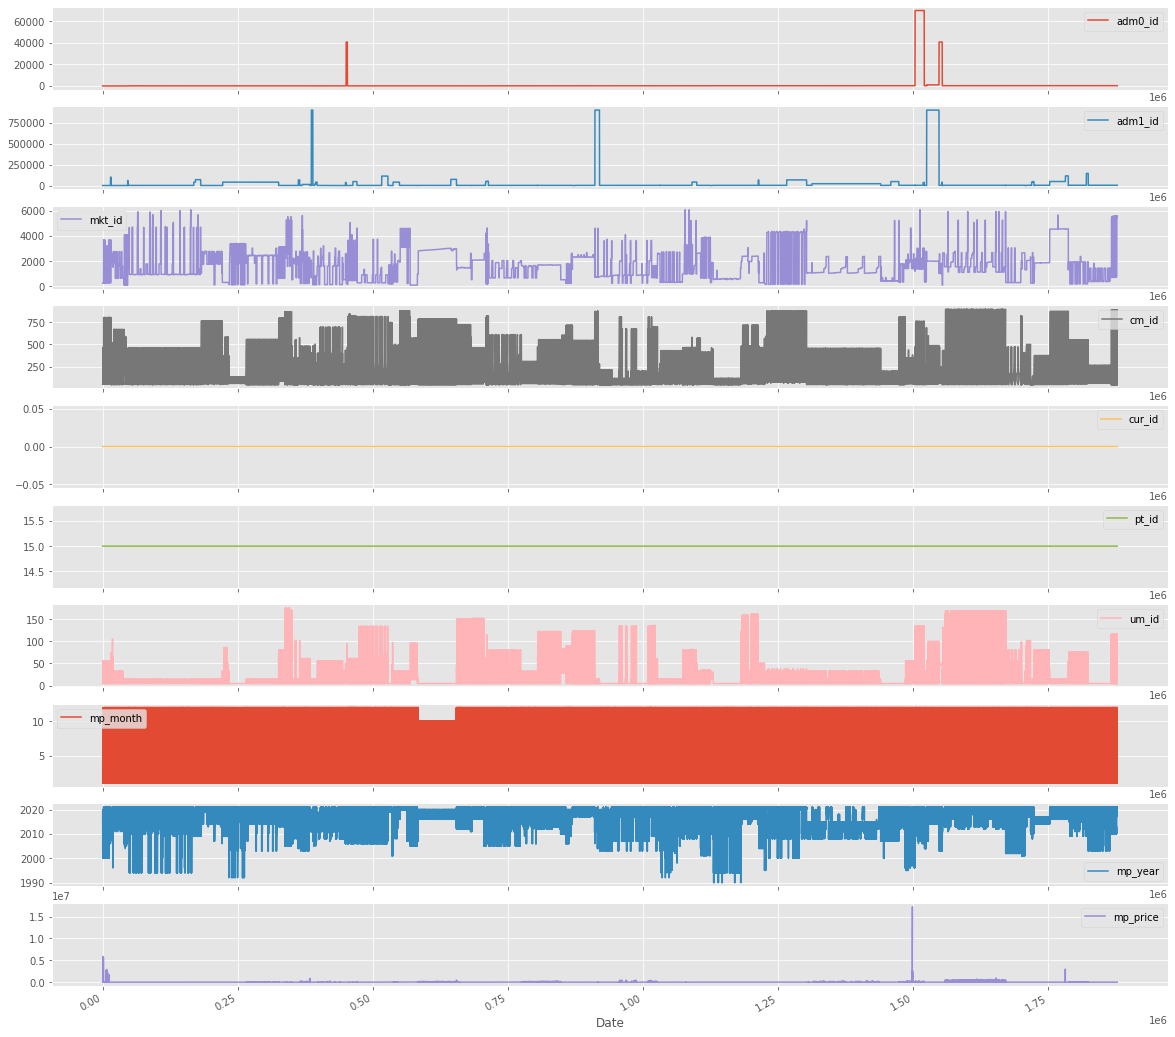

In [167]:
plt.figure()
df5.plot(subplots=True, figsize=(20,20))
plt.xlabel("Date");

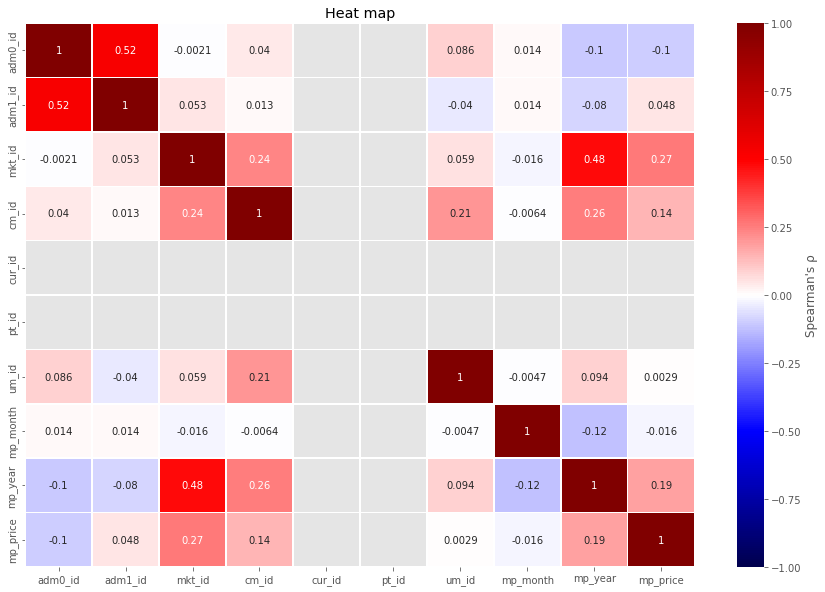

In [168]:
df_cm = df5.corr(method = 'spearman')

plt.figure(figsize=(15,10))
ax = sns.heatmap(df_cm, cmap="seismic", annot=True, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);
ax.set_title("Heat map");